# **TUGAS MENTORING**

## **ABOUT DATASET**

https://www.physionet.org/content/maternal-visceral-adipose/1.0.0/#Methods

**ABSTRAK**

Database ini berasal dari studi kohort tentang wanita hamil hingga 20 minggu kehamilan dan diikuti sampai melahirkan. Pengukuran jaringan adiposa visceral ibu (VAT) dilakukan selama USG obstetrik rutin. Pada saat ini, evaluasi biometrik juga dilakukan, dan informasi diperoleh dari perawatan prenatal. Hasil kehamilan, termasuk diabetes mellitus gestasional (GDM), diperoleh melalui evaluasi rekam medis pasien di rumah sakit tempat mereka berada. Data dikumpulkan sebagai bagian dari penelitian yang berusaha mengevaluasi apakah VAT ibu dapat memprediksi GDM pada saat persalinan. Variabel yang termasuk dalam dataset ini adalah usia ibu, DM sebelumnya, tekanan darah (pada hari yang sama pengukuran VAT), VAT (di daerah periumbilikal), usia kehamilan pada saat inklusi, jumlah kehamilan, kadar glukosa puasa pertama, indeks massa tubuh pra-kehamilan (BMI). Juga, hasil kehamilan: usia kehamilan saat lahir, jenis persalinan (kelahiran normal atau caesar), berat lahir anak dan diagnosis GDM.

**DESKRIPSI**

Terdapat banyak bukti yang menunjukkan bahwa lemak viseral lebih penting dalam memprediksi risiko metabolik daripada indeks massa tubuh (BMI) pada orang dewasa dan hubungannya tampaknya lebih tinggi pada wanita. Namun, karena kesulitan menggunakan metode tradisional untuk penilaian lemak sentral (rasio pinggang-pinggul dan tomografi abdomen) pada kehamilan dan mahalnya biaya pencitraan resonansi magnetik, penggunaan ultrasonografi untuk evaluasi jaringan adiposa viseral (VAT) telah menunjukkan hasil yang menjanjikan. Pengukuran VAT baru-baru ini dikaitkan dengan GDM, gangguan glukosa puasa, dan resistensi insulin bahkan setelah mengontrol BMI. Namun, penelitian-penelitian ini biasanya mengevaluasi wanita hamil yang mengalami eutrofik, kelebihan berat badan, dan obesitas secara bersamaan.

**Variables:**

Number: Unique ID for the case.

Age (years): Age in years.

Ethnicity: Ethnicity (0 = white; 1 = not white).

Diabetes mellitus: Previous diabetes mellitus (0 = no; 1 = yes).

Mean diastolic BP: Mean diastolic blood pressure in mmHg.

Mean systolic BP: Mean systolic blood pressure in mmHg.

Central Armellini fat (mm): Maternal visceral adipose tissue measurement in mm.

Current Gestational age: Age (weeks of pregnancy, days of pregnancy).

Pregnancies (number): Number of pregnancies.

First fasting glucose (mg/dl): First measured fasting glucose.

BMI pregestational (kg/m):
Pregestational body mass index.

Gestational age at birth: Age (weeks of pregnancy, days of pregnancy).

Type of delivery: 0 = vaginal birth; 1 = cesarian section.

Child birth weight (g): Birthweight in grams.

Gestational DM (current gestational diabetes): 0 = no; 1 = yes.

## **UPLOAD DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
from sklearn.svm import SVC

Membaca dan menampilkan sebagian dataset yang telah di upload menggunakan library `pandas`. Karena dataset berupa file .csv maka menggunakan `pd.read_csv`

Dataset didefinisikan sebagai `df_visceral`

In [ ]:
df_visceral= pd.read_csv('visceral_fat.csv')
df_visceral.head()

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.1,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.1,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.4,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.6,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.8,"11,2",2.0,86.0,30.85,"40,2",1,3930,1


## **Deskripsi Dataset**


In [ ]:
#Melihat list variabel dari dataset
list(df_visceral)

['number',
 'age (years)',
 'ethnicity',
 'diabetes mellitus',
 'mean diastolic bp (mmhg)',
 'mean systolic bp (mmhg)',
 'central armellini fat (mm)',
 'current gestational age',
 'pregnancies (number)',
 'first fasting glucose (mg/dl)',
 'bmi pregestational (kg/m)',
 'gestational age at birth',
 'type of delivery',
 'child birth weight (g)',
 'gestational dm']

In [ ]:
df_visceral.dtypes

number                             int64
age (years)                        int64
ethnicity                        float64
diabetes mellitus                  int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age           object
pregnancies (number)             float64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth          object
type of delivery                   int64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

In [ ]:
df_visceral = df_visceral.drop('number', axis=1)
df_visceral['current gestational age']=df_visceral['current gestational age'].str.replace(',','.')
df_visceral['gestational age at birth']=df_visceral['gestational age at birth'].str.replace(',','.')
df_visceral['gestational age at birth']=pd.to_numeric(df_visceral['gestational age at birth'])
df_visceral['current gestational age']=pd.to_numeric(df_visceral['current gestational age'])

In [ ]:
df_visceral.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,20,NaN,0,73.5,125.0,28.1,12.1,1.0,NaN,33.20,41.0,1,3840,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.0,21.50,39.1,0,2810,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.0,21.41,39.5,0,2455,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,NaN,55.36,39.4,0,3400,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.0,30.85,40.2,1,3930,1


================================================================================================================

Mengetahui informasi dari dataset yang diantaranya yaitu jumlah missing values dan tipe data pada masing-masing kolom atau variabel

In [ ]:
df_visceral.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age (years)                    133 non-null    int64  
 1   ethnicity                      132 non-null    float64
 2   diabetes mellitus              133 non-null    int64  
 3   mean diastolic bp (mmhg)       133 non-null    float64
 4   mean systolic bp (mmhg)        133 non-null    float64
 5   central armellini fat (mm)     133 non-null    float64
 6   current gestational age        133 non-null    float64
 7   pregnancies (number)           128 non-null    float64
 8   first fasting glucose (mg/dl)  103 non-null    float64
 9   bmi pregestational (kg/m)      132 non-null    float64
 10  gestational age at birth       133 non-null    float64
 11  type of delivery               133 non-null    int64  
 12  child birth weight (g)         133 non-null    int

## **Data Preparation**

###**Missing Value Chacking & Handling**

In [ ]:
#Missing Value Checking
print(df_visceral.isnull().sum())

age (years)                       0
ethnicity                         1
diabetes mellitus                 0
mean diastolic bp (mmhg)          0
mean systolic bp (mmhg)           0
central armellini fat (mm)        0
current gestational age           0
pregnancies (number)              5
first fasting glucose (mg/dl)    30
bmi pregestational (kg/m)         1
gestational age at birth          0
type of delivery                  0
child birth weight (g)            0
gestational dm                    0
dtype: int64


In [ ]:
#Deskripsi Dataset
df_visceral.describe()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
count,133.000000,132.000000,133.000000,133.000000,133.000000,133.000000,133.000000,128.000000,103.000000,132.000000,133.000000,133.000000,133.000000,133.000000
mean,25.804511,0.439394,0.007519,70.593985,116.578947,44.230827,15.411278,2.351562,81.272816,27.871136,39.010526,0.240602,3257.563910,0.135338
std,6.366887,0.498204,0.086711,8.657662,13.879602,14.606195,3.817735,1.686397,9.429794,6.874268,1.950457,0.429065,490.318578,0.343378
min,15.000000,0.000000,0.000000,51.500000,90.000000,12.700000,6.200000,1.000000,60.000000,15.810000,27.100000,0.000000,1105.000000,0.000000
25%,21.000000,0.000000,0.000000,64.500000,107.000000,34.600000,13.000000,1.000000,76.500000,22.550000,38.300000,0.000000,2944.000000,0.000000
50%,25.000000,0.000000,0.000000,70.000000,114.000000,42.500000,16.200000,2.000000,80.000000,26.260000,39.400000,0.000000,3220.000000,0.000000
75%,30.000000,1.000000,0.000000,75.500000,125.000000,52.700000,18.100000,3.000000,86.500000,30.935000,40.300000,0.000000,3610.000000,0.000000
max,43.000000,1.000000,1.000000,100.500000,167.000000,94.400000,31.500000,9.000000,114.000000,55.360000,41.100000,1.000000,4534.000000,1.000000


Library `missingno` digunakan untuk visualisasi missing value yang terdapat pada dataset. Tak hanya berbentuk bar chart, tetapi bisa juga dalam bentuk matrix ataupun heatmap

<Axes: >

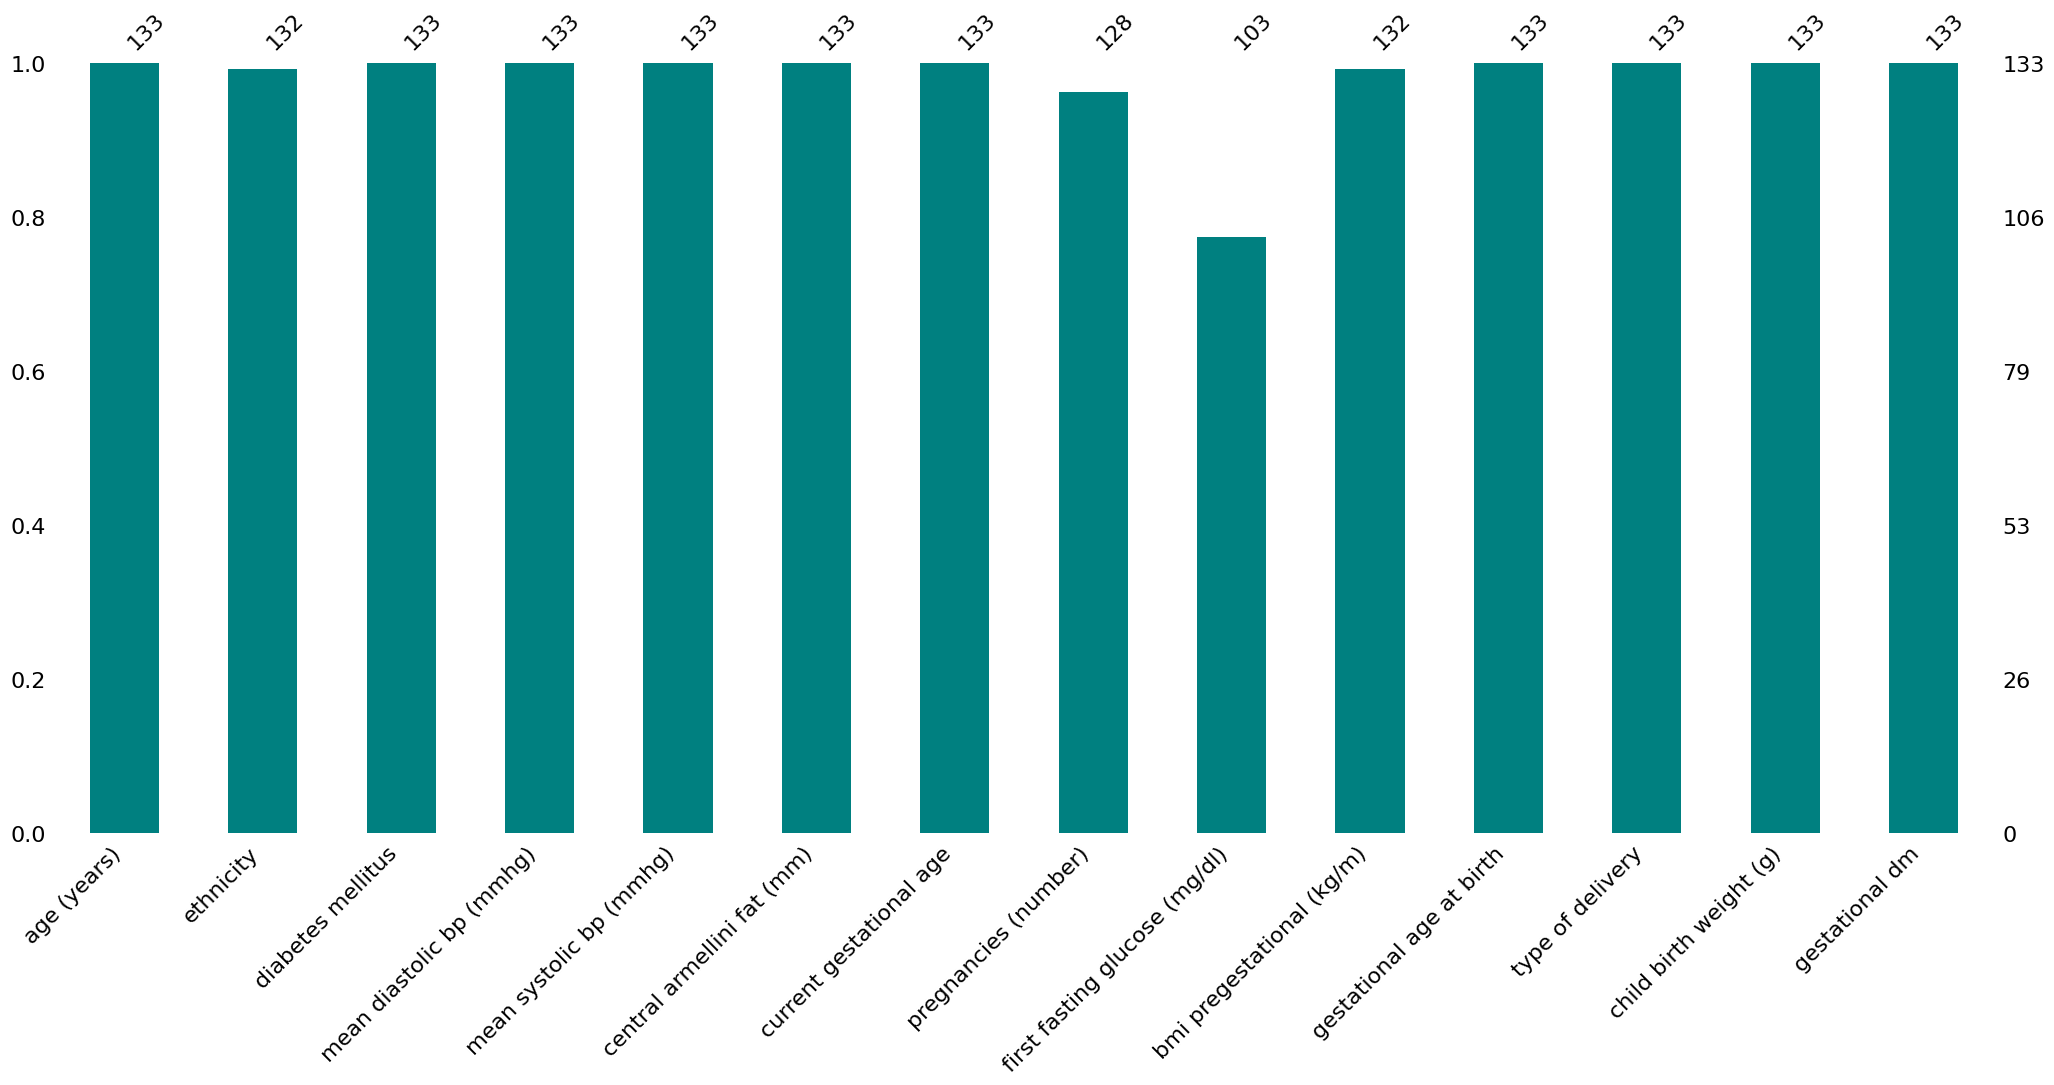

In [ ]:
#Missing Value Checking Menggunakan Library Missingno
import missingno as msno
msno.bar(df_visceral, color='teal')

In [ ]:
df_visceral_copy=df_visceral.copy()

In [ ]:
df_visceral_copy.dtypes

age (years)                        int64
ethnicity                        float64
diabetes mellitus                  int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)             float64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
type of delivery                   int64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

Mengisi missing value dengan mode, median, dan mean

In [ ]:
df_visceral_copy['ethnicity'].fillna(df_visceral_copy['ethnicity'].mode(), inplace = True)
df_visceral_copy['pregnancies (number)'].fillna(df_visceral_copy['pregnancies (number)'].median(), inplace = True)
df_visceral_copy['first fasting glucose (mg/dl)'].fillna(df_visceral_copy['first fasting glucose (mg/dl)'].mean(), inplace = True)
df_visceral_copy['bmi pregestational (kg/m)'].fillna(df_visceral_copy['bmi pregestational (kg/m)'].mean(), inplace = True)

In [ ]:
df_visceral_copy.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,20,0.0,0,73.5,125.0,28.1,12.1,1.0,81.272816,33.20,41.0,1,3840,0
1,28,0.0,0,75.5,112.0,43.1,11.5,1.0,76.000000,21.50,39.1,0,2810,0
2,21,1.0,0,70.5,116.0,41.4,12.6,1.0,86.000000,21.41,39.5,0,2455,0
3,25,0.0,0,92.5,167.0,39.6,16.2,4.0,81.272816,55.36,39.4,0,3400,0
4,33,1.0,0,79.0,137.0,67.8,11.2,2.0,86.000000,30.85,40.2,1,3930,1


In [ ]:
df_visceral_copy.dtypes

age (years)                        int64
ethnicity                        float64
diabetes mellitus                  int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)             float64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
type of delivery                   int64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

Checking Jumlah Missing Value setelah dilakukan missing value handling

In [ ]:
## showing the count of Nans
print(df_visceral_copy.isnull().sum())

age (years)                      0
ethnicity                        0
diabetes mellitus                0
mean diastolic bp (mmhg)         0
mean systolic bp (mmhg)          0
central armellini fat (mm)       0
current gestational age          0
pregnancies (number)             0
first fasting glucose (mg/dl)    0
bmi pregestational (kg/m)        0
gestational age at birth         0
type of delivery                 0
child birth weight (g)           0
gestational dm                   0
dtype: int64


Dapat diketahui bahwa sudah tidak ada data yang hilang pada dataset

Missing Values Chacking dengan bar plot menggunakan library missingno

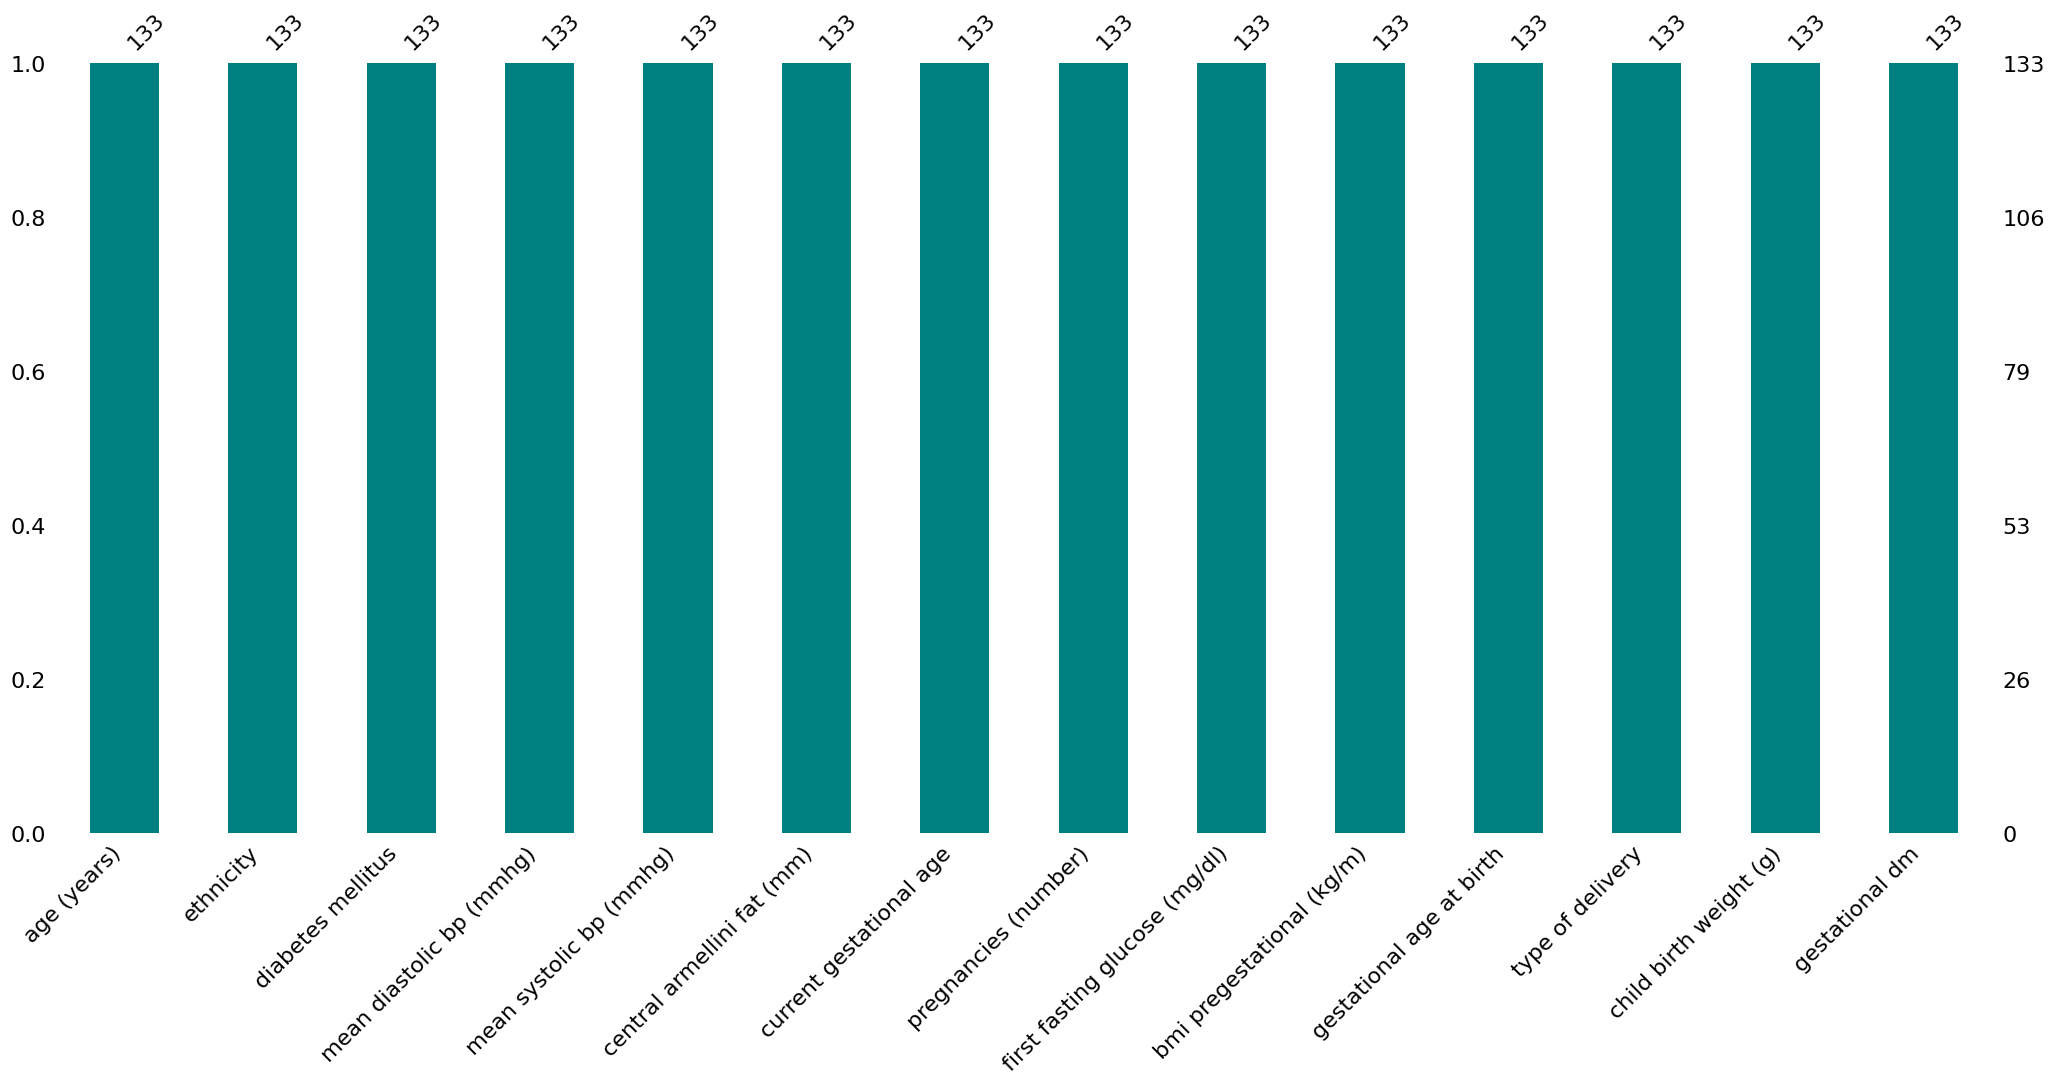

In [ ]:
import missingno as msno
p=msno.bar(df_visceral_copy, color='teal')

In [ ]:
df_visceral_copy['ethnicity']=df_visceral_copy['ethnicity'].astype('int')
df_visceral_copy['ethnicity']=df_visceral_copy['ethnicity'].astype('object')
df_visceral_copy['pregnancies (number)']=df_visceral_copy['pregnancies (number)'].astype('int')
df_visceral_copy['diabetes mellitus']=df_visceral_copy['diabetes mellitus'].astype('object')
df_visceral_copy['type of delivery']=df_visceral_copy['type of delivery'].astype('object')

In [ ]:
df_visceral_copy.dtypes

age (years)                        int64
ethnicity                         object
diabetes mellitus                 object
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)               int64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
type of delivery                  object
child birth weight (g)             int64
gestational dm                     int64
dtype: object

In [ ]:
df_visceral_copy.head()

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,20,0,0,73.5,125.0,28.1,12.1,1,81.272816,33.20,41.0,1,3840,0
1,28,0,0,75.5,112.0,43.1,11.5,1,76.000000,21.50,39.1,0,2810,0
2,21,1,0,70.5,116.0,41.4,12.6,1,86.000000,21.41,39.5,0,2455,0
3,25,0,0,92.5,167.0,39.6,16.2,4,81.272816,55.36,39.4,0,3400,0
4,33,1,0,79.0,137.0,67.8,11.2,2,86.000000,30.85,40.2,1,3930,1


> ### Mencari Nilai Mean, Median, dan Modus

In [ ]:
#Categorical Variable
data_cat = [i for i in df_visceral_copy.columns if df_visceral_copy[i].dtype == 'object']

#Numerical Variable
data_num = [i for i in df_visceral_copy.columns if df_visceral_copy[i].dtype != 'object']

In [ ]:
df_visceral_copy[data_num].dtypes

age (years)                        int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)               int64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

In [ ]:
data_cat

['ethnicity', 'diabetes mellitus', 'type of delivery']

In [ ]:
data_num

['age (years)',
 'mean diastolic bp (mmhg)',
 'mean systolic bp (mmhg)',
 'central armellini fat (mm)',
 'current gestational age',
 'pregnancies (number)',
 'first fasting glucose (mg/dl)',
 'bmi pregestational (kg/m)',
 'gestational age at birth',
 'child birth weight (g)',
 'gestational dm']

In [ ]:
mean = df_visceral_copy[data_num].mean()
var = df_visceral_copy[data_num].var()
std = df_visceral_copy[data_num].std()
median = df_visceral_copy[data_num].median()
mode = df_visceral_copy[data_num].mode()

print(f'MEAN OF ALL VALUES\n\n{mean}\n\n\nVARIANCE OF ALL VALUES\n\n{var}\n\n\nSTANDARD DEVIATION OF ALL VALUES\n\n{std}\n\n\nMEDIAN OF ALL VALUES\n\n{median}\n\n\nMODE OF ALL VALUES\n\n{mode}')

MEAN OF ALL VALUES

age (years)                        25.804511
mean diastolic bp (mmhg)           70.593985
mean systolic bp (mmhg)           116.578947
central armellini fat (mm)         44.230827
current gestational age            15.411278
pregnancies (number)                2.338346
first fasting glucose (mg/dl)      81.272816
bmi pregestational (kg/m)          27.871136
gestational age at birth           39.010526
child birth weight (g)           3257.563910
gestational dm                      0.135338
dtype: float64


VARIANCE OF ALL VALUES

age (years)                          40.537252
mean diastolic bp (mmhg)             74.955115
mean systolic bp (mmhg)             192.643341
central armellini fat (mm)          213.340936
current gestational age              14.575099
pregnancies (number)                  2.740715
first fasting glucose (mg/dl)        68.711696
bmi pregestational (kg/m)            46.897560
gestational age at birth              3.804282
child birth weight (g

In [ ]:
# Value count
for col in data_cat:
    print(f'''Value count kolom {col}:''')
    print(df_visceral_copy[col].value_counts())
    print()

Value count kolom ethnicity:
0    75
1    58
Name: ethnicity, dtype: int64

Value count kolom diabetes mellitus:
0    132
1      1
Name: diabetes mellitus, dtype: int64

Value count kolom type of delivery:
0    101
1     32
Name: type of delivery, dtype: int64



In [ ]:
df_visceral_copy[data_num].dtypes

age (years)                        int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)               int64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

In [ ]:
mean = df_visceral_copy['bmi pregestational (kg/m)'].mean()
var = df_visceral_copy['bmi pregestational (kg/m)'].var()
std = df_visceral_copy['bmi pregestational (kg/m)'].std()
median = df_visceral_copy['bmi pregestational (kg/m)'].median()
mode = df_visceral_copy['bmi pregestational (kg/m)'].mode()

print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}\nMedian = {median}\nModus = {mode}")

Mean = 27.871136363636364
Variance = 46.89756007231405
Standard Deviation = 6.848179325361891
Median = 26.3
Modus = 0    30.48
Name: bmi pregestational (kg/m), dtype: float64


> ### Mencari nilai korelasi antar 2 variabel

In [ ]:
df_visceral_copy[['gestational age at birth', 'child birth weight (g)']].corr()

,gestational age at birth,child birth weight (g)
gestational age at birth,1.000000,0.633529
child birth weight (g),0.633529,1.000000


> ### Mencari Outlier

In [ ]:
df_visceral_copy[data_num].head()

,age (years),mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,child birth weight (g),gestational dm
0,20,73.5,125.0,28.1,12.1,1,81.272816,33.20,41.0,3840,0
1,28,75.5,112.0,43.1,11.5,1,76.000000,21.50,39.1,2810,0
2,21,70.5,116.0,41.4,12.6,1,86.000000,21.41,39.5,2455,0
3,25,92.5,167.0,39.6,16.2,4,81.272816,55.36,39.4,3400,0
4,33,79.0,137.0,67.8,11.2,2,86.000000,30.85,40.2,3930,1


In [ ]:
df_visceral_copy[data_num].dtypes

age (years)                        int64
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)               int64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
child birth weight (g)             int64
gestational dm                     int64
dtype: object

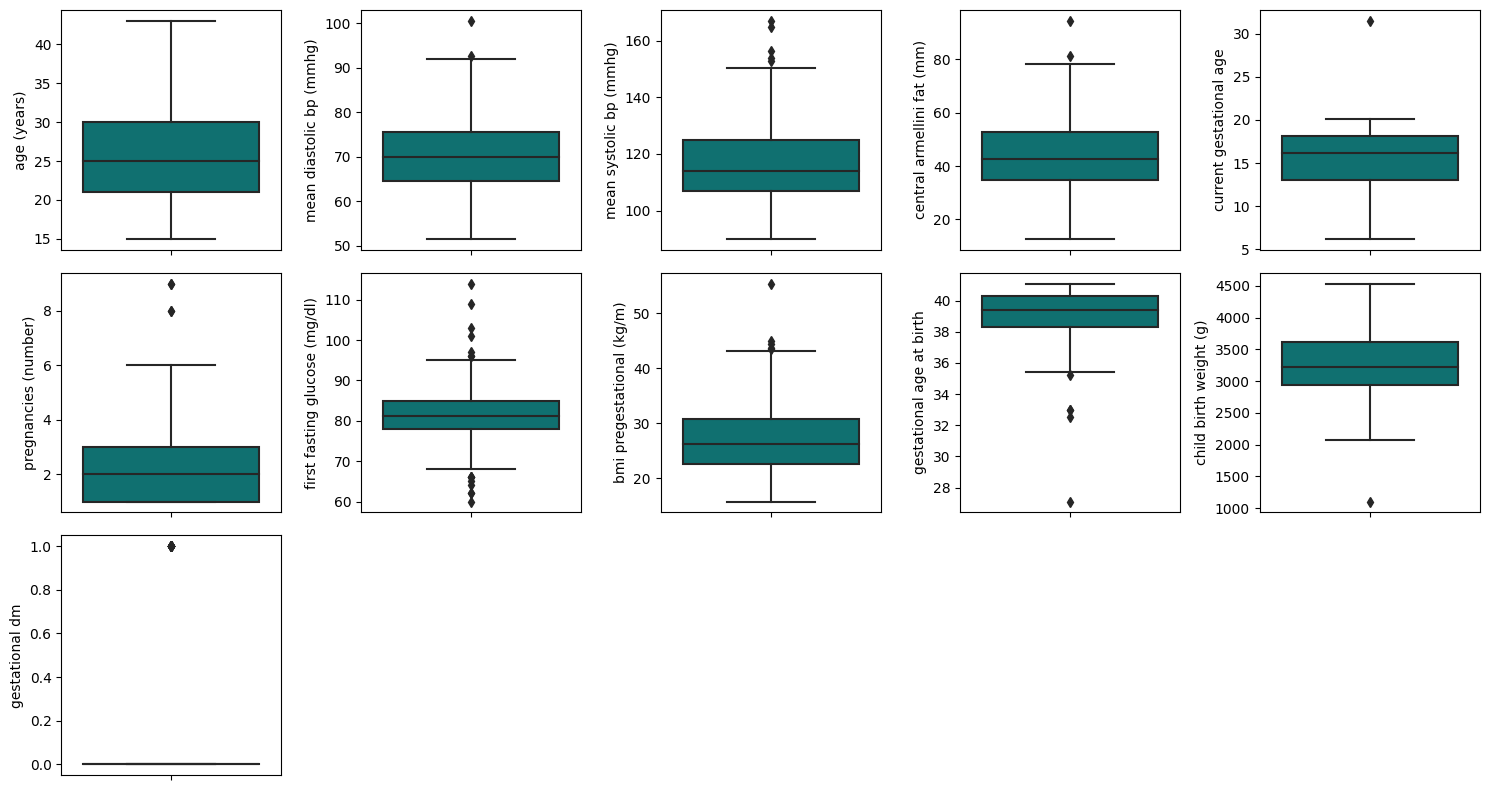

In [ ]:
plt.figure(figsize=(15,8))
for i in range(0, len(data_num)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df_visceral_copy[data_num[i]], color='teal', orient='v')
    plt.tight_layout()

In [ ]:
Q1 = df_visceral_copy['first fasting glucose (mg/dl)'].quantile(0.25)
Q3 = df_visceral_copy['first fasting glucose (mg/dl)'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)

In [ ]:
print(low_limit)
print(high_limit)

67.5
95.5


In [ ]:
outlier_ffg = ((df_visceral_copy['first fasting glucose (mg/dl)'] < low_limit) | (df_visceral_copy['first fasting glucose (mg/dl)'] > high_limit))
data_outlier_ffg = df_visceral_copy[outlier_ffg]

In [ ]:
data_outlier_ffg.head(20)

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
17,40,0,0,74.0,144.0,81.30,18.6,9,97.0,43.41,39.6,0,2936,0
26,37,0,0,84.0,125.0,36.70,11.4,8,96.0,24.22,37.4,1,3175,1
29,30,1,0,52.5,98.5,30.90,19.0,4,62.0,20.39,39.1,0,2770,0
47,31,0,0,65.5,107.0,20.60,6.2,1,66.0,25.88,40.3,0,3220,0
49,21,1,0,64.5,107.0,34.60,15.5,1,65.0,19.65,39.4,0,3045,0
50,23,1,0,60.0,104.5,39.60,6.5,2,96.0,35.96,40.2,1,3505,1
54,36,0,0,75.5,127.5,63.00,19.4,4,101.0,40.26,37.5,0,3160,1
71,28,0,0,85.0,130.5,52.70,19.2,3,64.0,20.30,37.6,0,2940,0
77,20,1,0,73.5,113.5,35.70,11.4,1,109.0,29.34,40.0,0,3650,0
83,36,0,0,100.5,165.0,78.20,12.3,2,103.0,44.90,36.4,0,3210,1


In [ ]:
data_outlier_ffg.shape

(15, 14)

## **COUNTPLOT**

In [ ]:
df_visceral.dtypes

age (years)                        int64
ethnicity                         object
diabetes mellitus                 object
mean diastolic bp (mmhg)         float64
mean systolic bp (mmhg)          float64
central armellini fat (mm)       float64
current gestational age          float64
pregnancies (number)             float64
first fasting glucose (mg/dl)    float64
bmi pregestational (kg/m)        float64
gestational age at birth         float64
type of delivery                  object
child birth weight (g)             int64
gestational dm                    object
dtype: object

<Axes: xlabel='count', ylabel='gestational dm'>

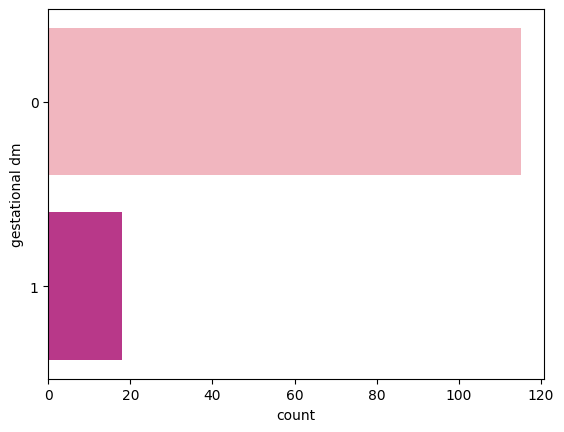

In [ ]:
sns.countplot(y=df_visceral['gestational dm'] ,data=df_visceral, palette='RdPu')

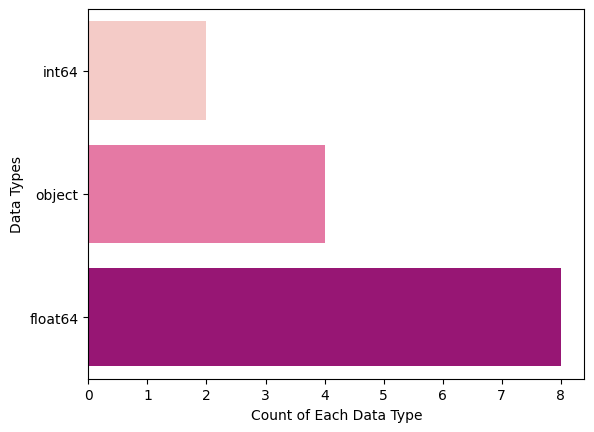

In [ ]:
#Menghitung jumlah tipe data dalam dataset
sns.countplot(y=df_visceral.dtypes ,data=df_visceral, palette='RdPu')
plt.xlabel("Count of Each Data Type")
plt.ylabel("Data Types")
plt.show()

Berdasarkan countplot tersebut, diketahui bahwa terdapat 3 tipe data dalam dataset, dimana terdapat 2 variabel yang merupakan int64, 8 variabel merupakan float64, dan 4 variabel merupakan object

## **HISTOGRAM**

In [ ]:
df_visceral = df_visceral.drop(df_visceral.columns[0], axis=1)

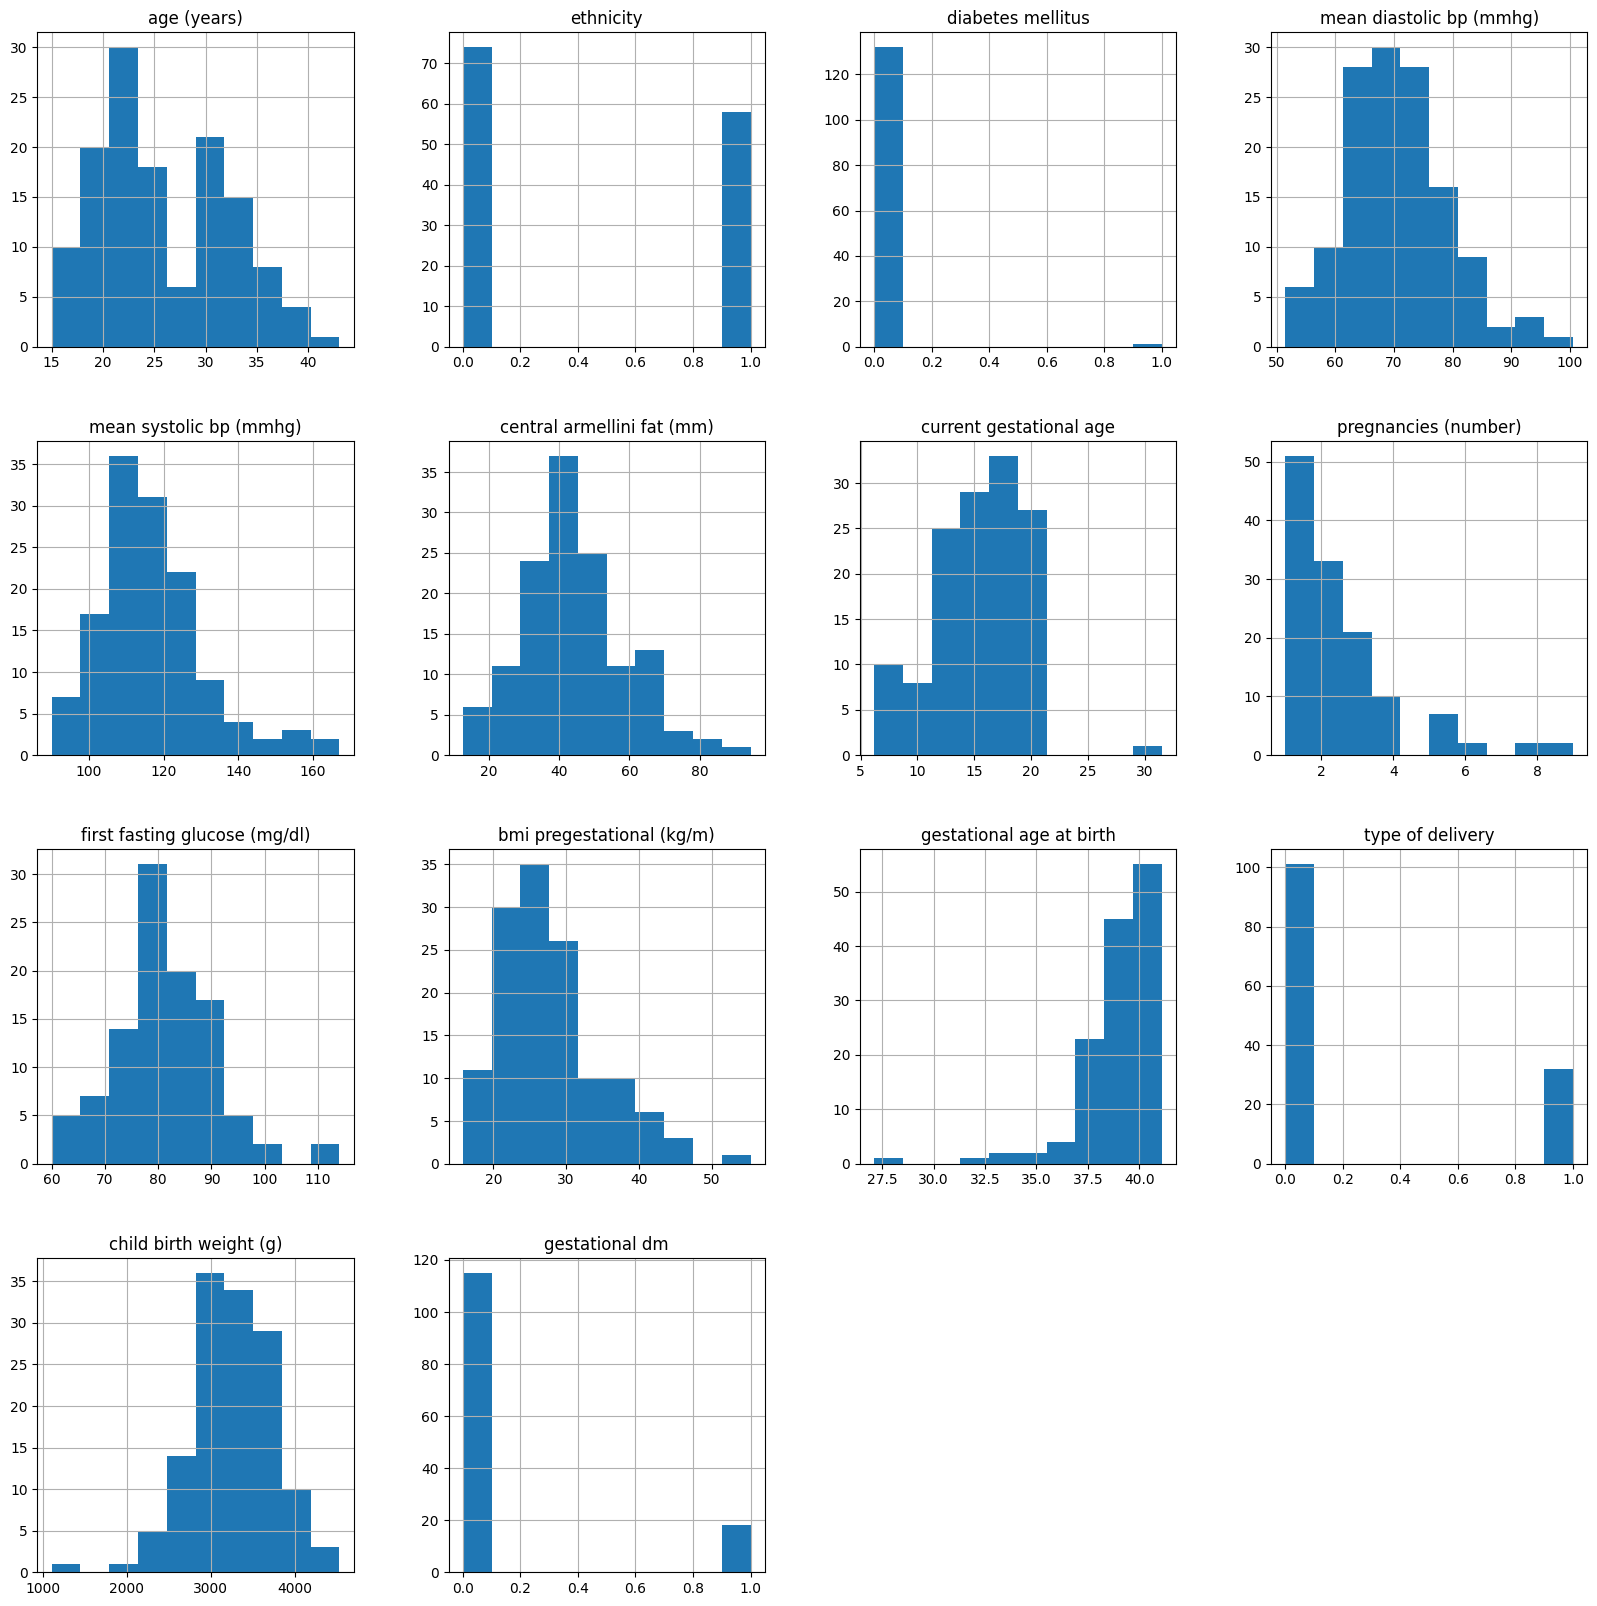

In [ ]:
histogram_v1 = df_visceral.hist(figsize = (20,20))

<Axes: xlabel='age (years)', ylabel='Count'>

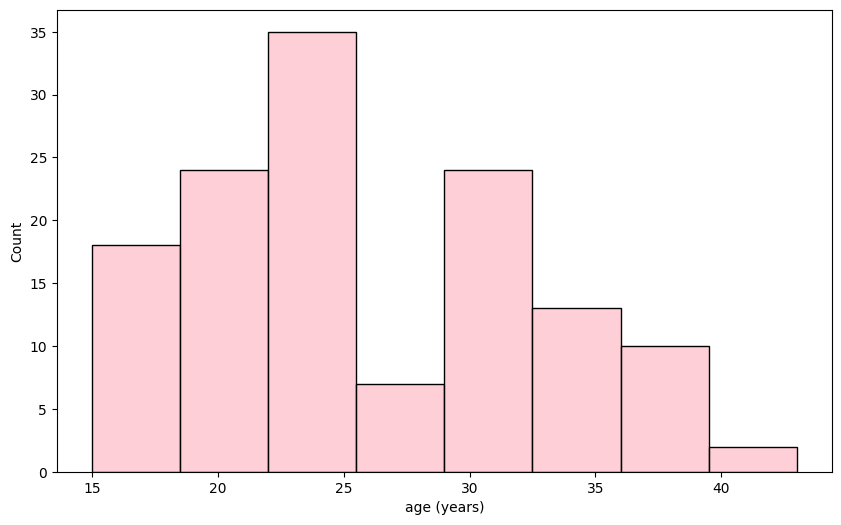

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_visceral_copy['age (years)'], color='pink', bins=8)



## **BAR CHART**

<Axes: xlabel='age (years)', ylabel='bmi pregestational (kg/m)'>

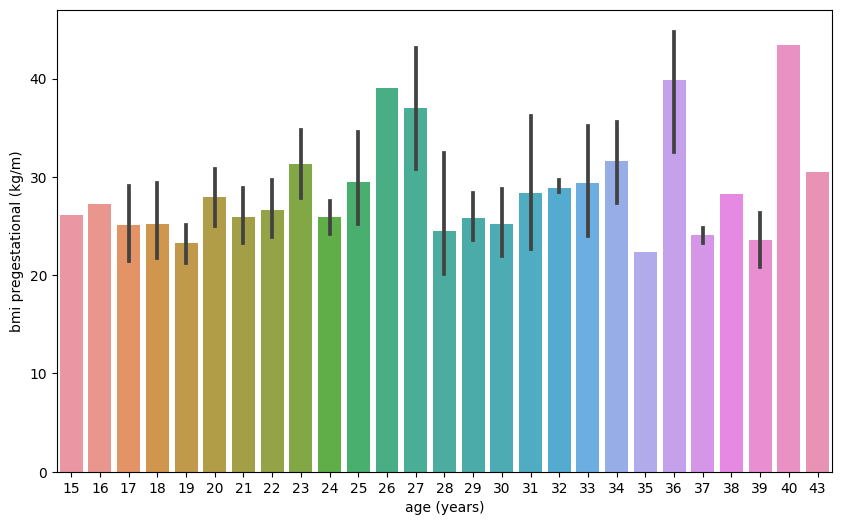

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df_visceral_copy['age (years)'], y=df_visceral_copy['bmi pregestational (kg/m)'], )

<Axes: xlabel='central armellini fat (mm)', ylabel='age (years)'>

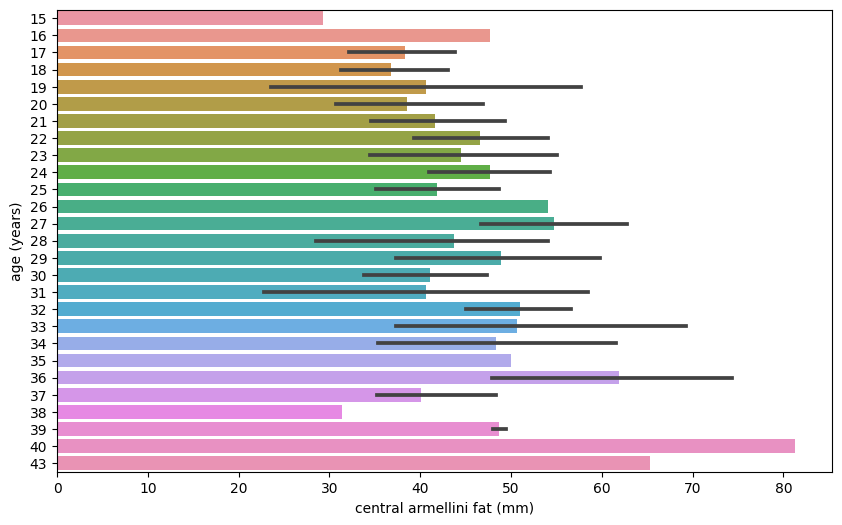

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y=df_visceral_copy['age (years)'], x=df_visceral_copy['central armellini fat (mm)'], orient='h')

##**BOXPLOT**

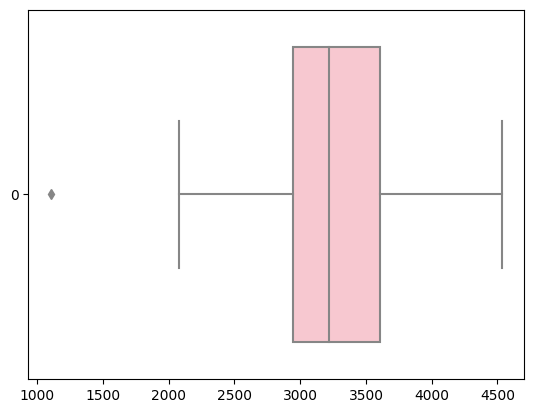

In [ ]:
boxplot_CBW = sns.boxplot(df_visceral['child birth weight (g)'],color='pink',orient='h')

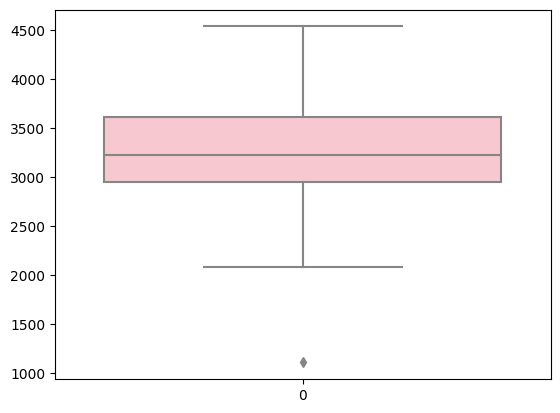

In [ ]:
boxplot_CBW = sns.boxplot(df_visceral['child birth weight (g)'],color='pink',orient='v')

##**HEATMAP**
Digunakan untuk visualisasi korelasi antar variabel

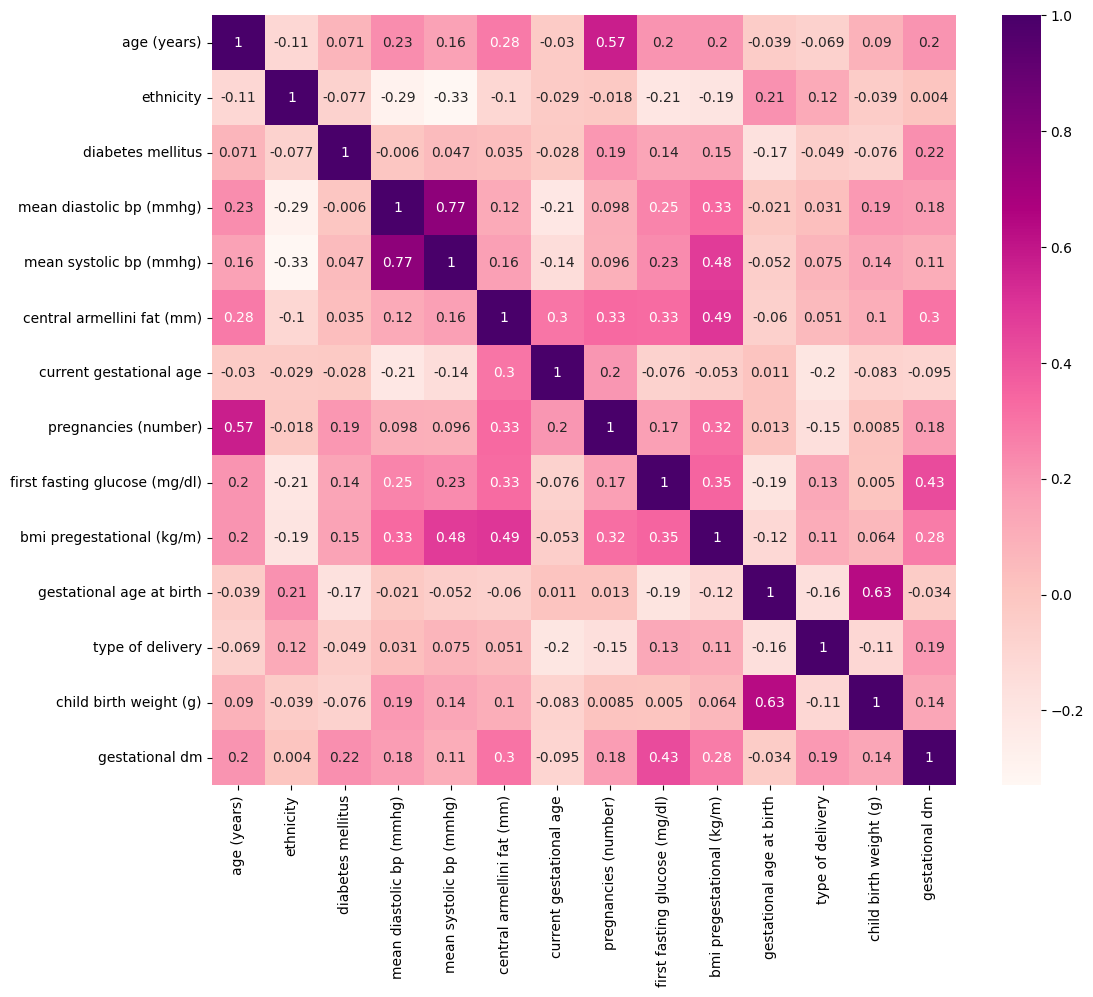

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df_visceral.corr(), annot=True, cmap='RdPu')  # seaborn has very simple solution for heatmap

## **SCATTERPLOT**

<Axes: xlabel='central armellini fat (mm)', ylabel='age (years)'>

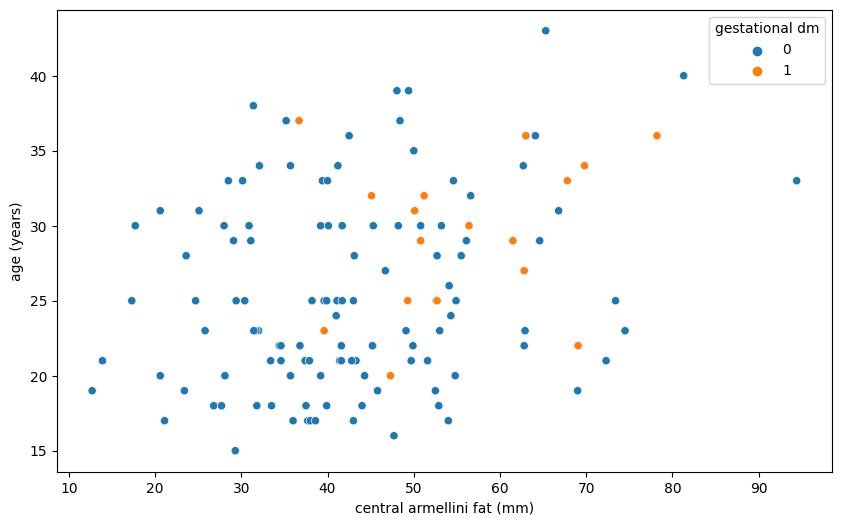

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_visceral, x='central armellini fat (mm)', y= 'age (years)', hue='gestational dm')

<Axes: xlabel='first fasting glucose (mg/dl)', ylabel='age (years)'>

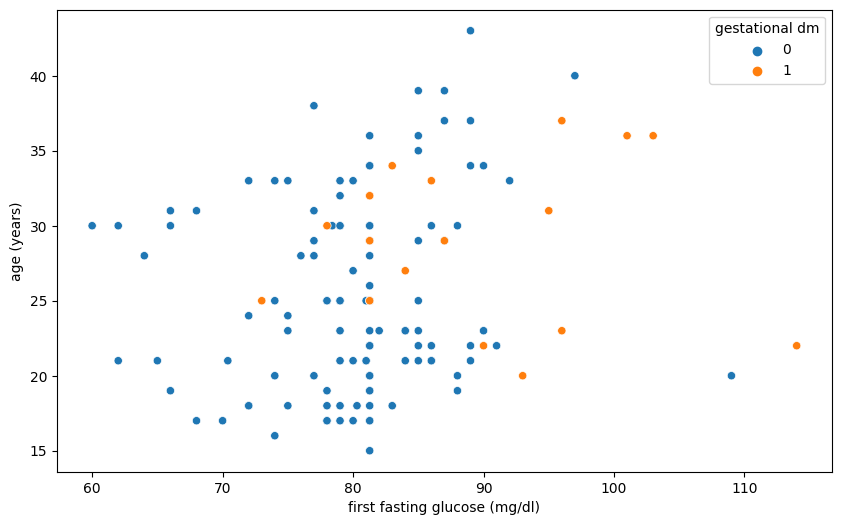

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_visceral_copy, x='first fasting glucose (mg/dl)', y= 'age (years)', hue='gestational dm')

## **PAIRPLOT**

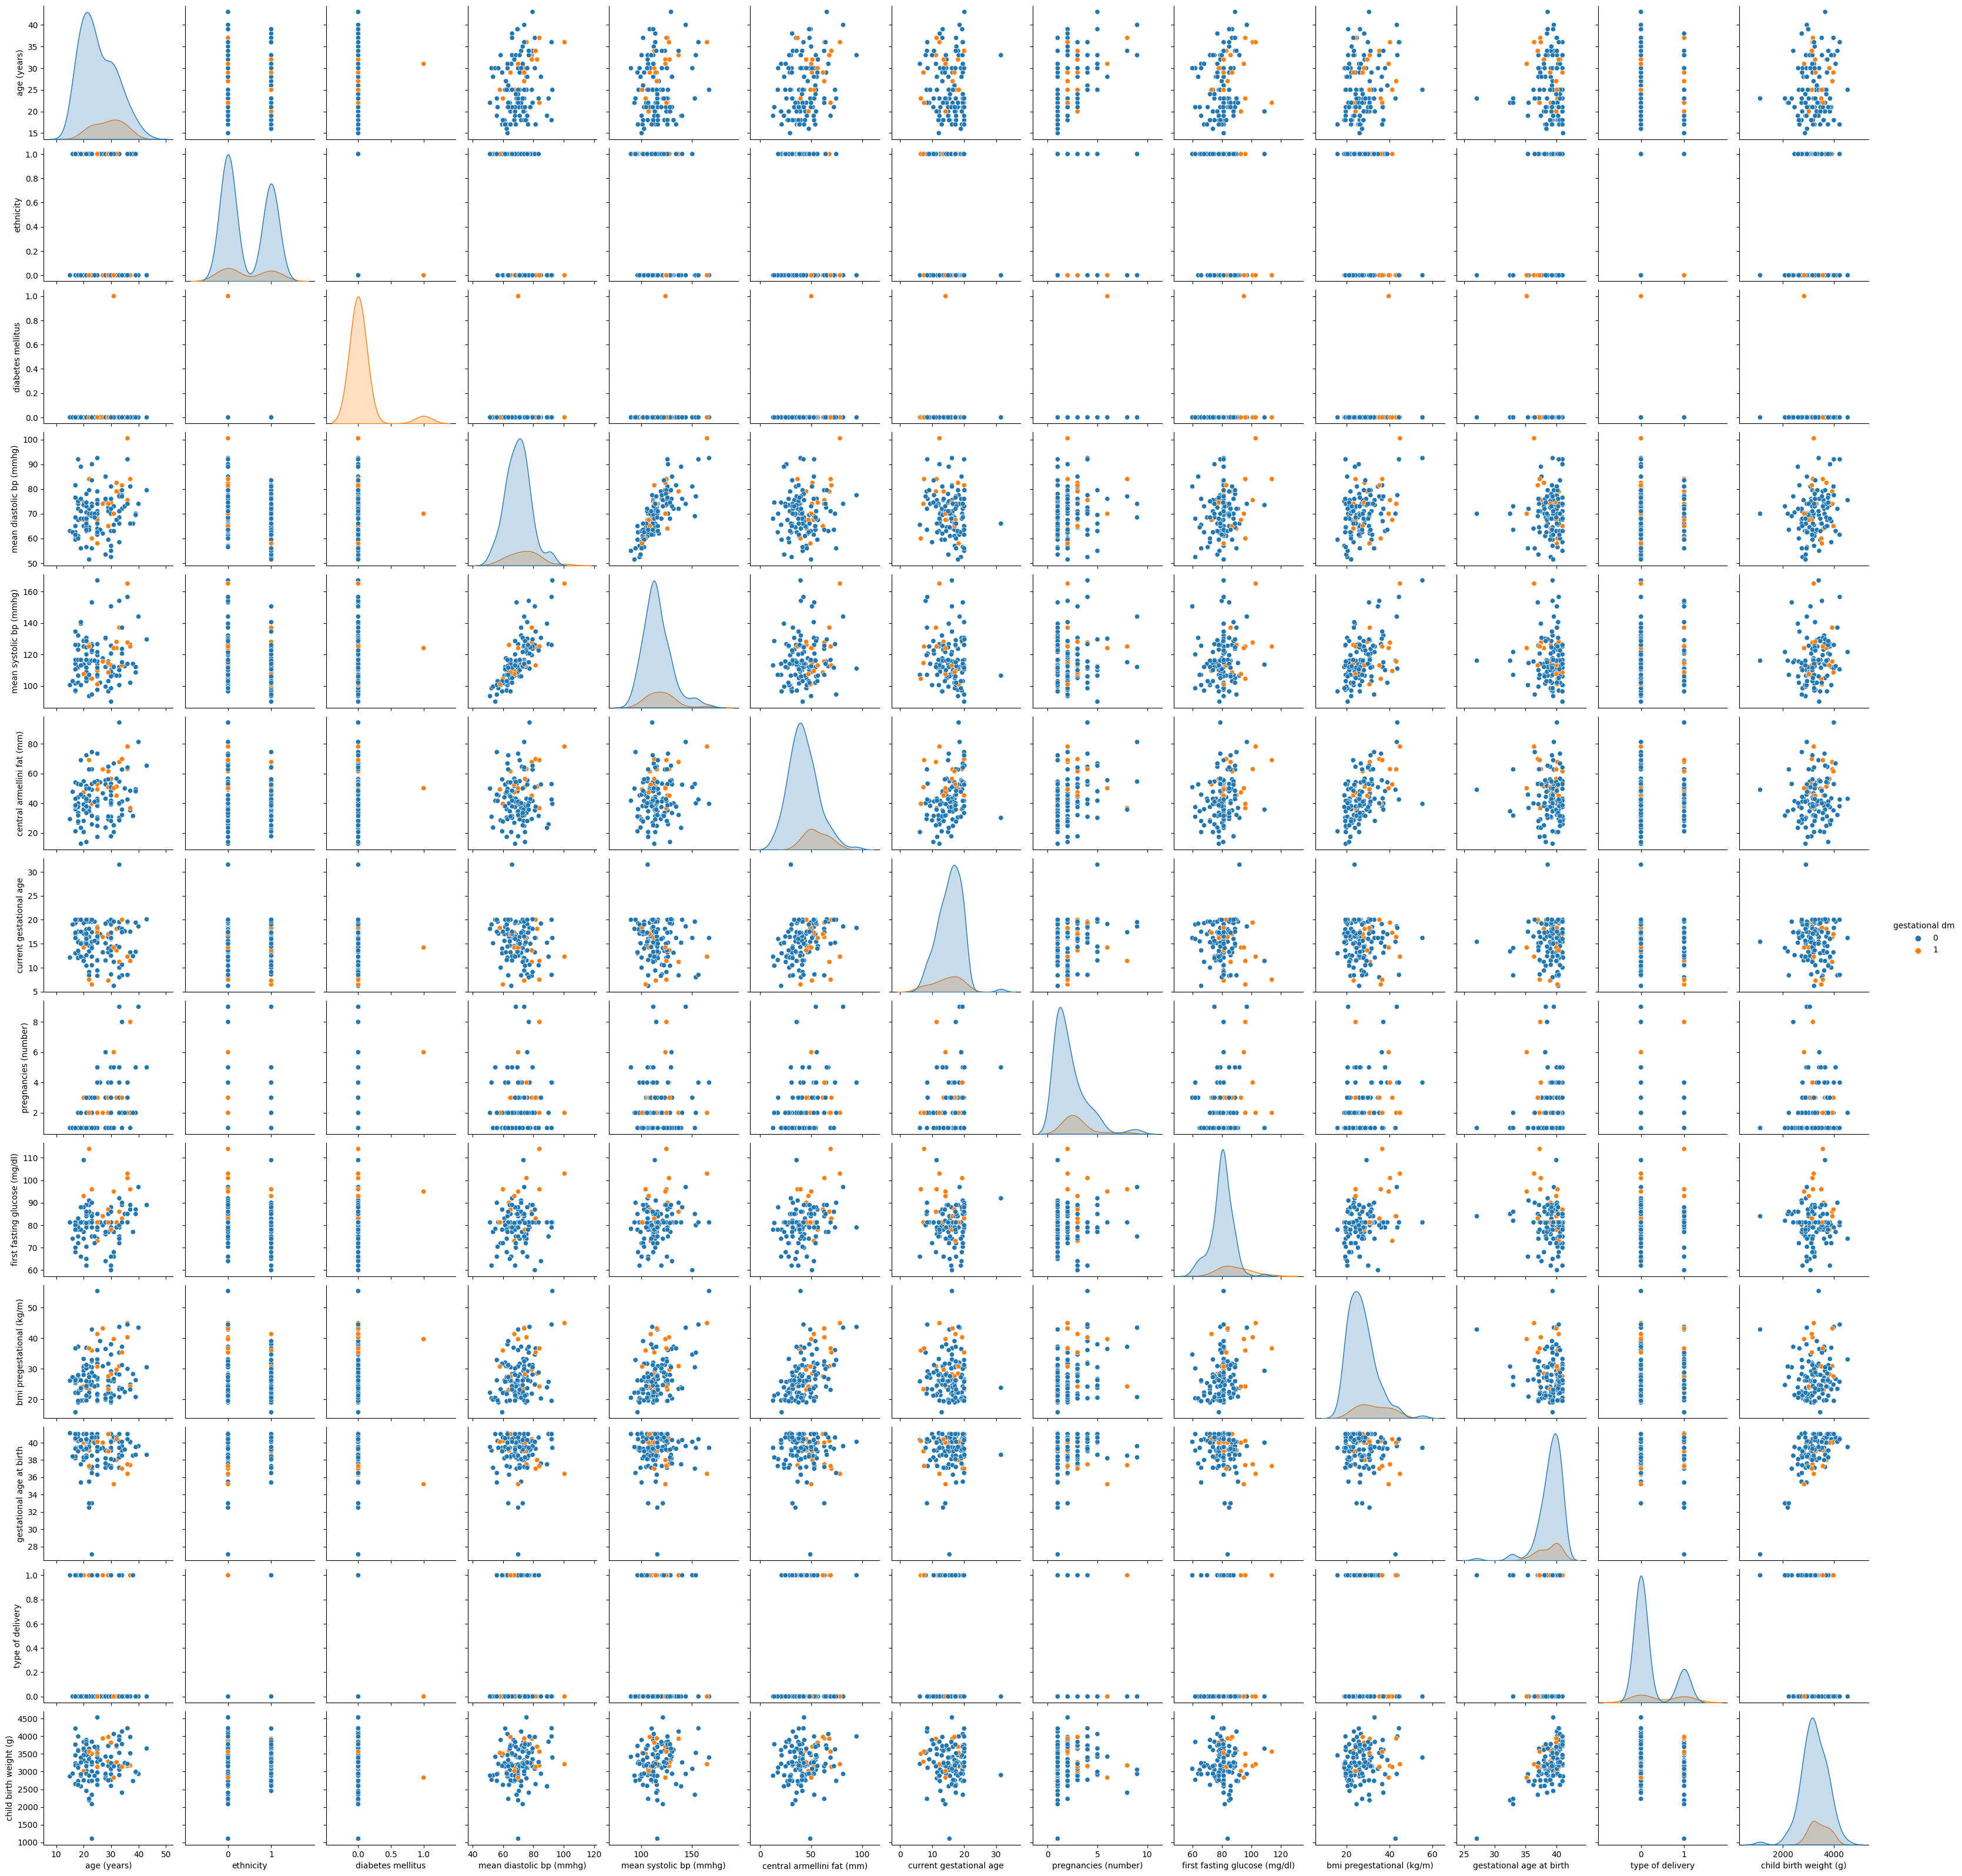

In [ ]:
sns.pairplot(df_visceral_copy, hue='gestational dm')

==============================================================================================================

## **SPLITING TRAINING & TEST DATA**

In [ ]:
X=df_visceral_copy.drop('gestational dm', axis=1)

In [ ]:
X

,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g)
0,20,0,0,73.5,125.0,28.10,12.1,1,81.272816,33.20,41.0,1,3840
1,28,0,0,75.5,112.0,43.10,11.5,1,76.000000,21.50,39.1,0,2810
2,21,1,0,70.5,116.0,41.40,12.6,1,86.000000,21.41,39.5,0,2455
3,25,0,0,92.5,167.0,39.60,16.2,4,81.272816,55.36,39.4,0,3400
4,33,1,0,79.0,137.0,67.80,11.2,2,86.000000,30.85,40.2,1,3930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,21,0,0,74.5,128.5,13.90,10.4,2,81.000000,21.22,38.3,0,3775
129,22,0,0,84.0,125.0,69.05,7.5,2,114.000000,36.64,37.3,1,3565
130,19,1,0,76.0,140.5,52.50,20.0,2,88.000000,23.62,40.3,1,3260
131,23,1,0,83.5,122.5,31.45,10.5,1,81.272816,28.76,40.6,1,3270


In [ ]:
y=df_visceral_copy['gestational dm']

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/5,random_state=42, stratify=y)

# Random Forest

> ## Random Forest with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, make_scorer

In [ ]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50, 100, 1000],
            'random_state': [0, 1, 42],
            'max_depth': [1,2,3,4,5]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_name = 'random_forest'
clf =  GridSearchCV(model_params[model_name]['model'], model_params[model_name]['params'], cv=5, return_train_score=False)
clf.fit(X, y)
scores = []
scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
})

In [ ]:
Result_df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
Result_df

,model,best_score,best_params
0,random_forest,0.887464,"{'max_depth': 3, 'n_estimators': 50, 'random_s..."


In [ ]:
#Random Forest Classification model with max_depth=3, random_state=42, n_estimators=50
from sklearn.ensemble import RandomForestClassifier
rand_for_model = RandomForestClassifier(max_depth=3, random_state=42, n_estimators= 50).fit(X_train, y_train)
y_pred_RF_train=rand_for_model.predict(X_train)
y_pred_RF_test=rand_for_model.predict(X_test)

print("Training Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_train, y_train))[:6])
print("Testing Accuracy  of Random ForestRandom Forest: " + str(rand_for_model.score(X_test, y_test))[:6])

Training Accuracy  of Random ForestRandom Forest: 0.9056
Testing Accuracy  of Random ForestRandom Forest: 0.9259


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_RF_test))
print(classification_report(y_test, y_pred_RF_test))
print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_RF_test))
print("\n","="*55,"\n")
pd.crosstab(y_test, y_pred_RF_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[23  0]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.50      0.67         4

    accuracy                           0.93        27
   macro avg       0.96      0.75      0.81        27
weighted avg       0.93      0.93      0.92        27



ROC AUC Score:  0.75




Predicted,0,1,All
Actual,,,
0,23,0,23
1,2,2,4
All,25,2,27


In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = rand_for_model.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,23,0,23
1,2,2,4
All,25,2,27


In [ ]:
print(confusion_matrix(y_train, y_pred_RF_train))
print(classification_report(y_train, y_pred_RF_train))
print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_RF_train))
print("\n","="*55,"\n")
pd.crosstab(y_train, y_pred_RF_train, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[92  0]
 [10  4]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        92
           1       1.00      0.29      0.44        14

    accuracy                           0.91       106
   macro avg       0.95      0.64      0.70       106
weighted avg       0.91      0.91      0.88       106



ROC AUC Score:  0.6428571428571428




Predicted,0,1,All
Actual,,,
0,92,0,92
1,10,4,14
All,102,4,106


In [ ]:
y_test

96     0
59     0
1      0
83     1
101    0
24     0
132    0
67     0
23     0
100    0
106    0
84     0
120    0
58     1
79     0
33     0
57     0
27     0
41     0
115    0
118    0
2      0
16     0
4      1
117    0
50     1
123    0
Name: gestational dm, dtype: int64

In [ ]:
y_pred_RF_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [ ]:
print(y_train)

12     0
121    0
0      0
78     0
31     0
      ..
127    0
68     1
15     1
3      0
10     0
Name: gestational dm, Length: 106, dtype: int64


In [ ]:
y_pred_RF_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

> ## Random Forest with default parameter

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)


# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8889


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_RF_train))
print("\n","="*55,"\n")
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[23  0]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        23
           1       1.00      0.25      0.40         4

    accuracy                           0.89        27
   macro avg       0.94      0.62      0.67        27
weighted avg       0.90      0.89      0.86        27



ROC AUC Score:  0.6428571428571428




Predicted,0,1,All
Actual,,,
0,23,0,23
1,3,1,4
All,26,1,27


In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=50, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:
X_train=pd.DataFrame(X_train)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

8     0.168153
5     0.139483
12    0.100196
7     0.096099
9     0.094070
10    0.093886
0     0.080469
4     0.069173
3     0.069107
6     0.064274
11    0.012944
2     0.006181
1     0.005964
dtype: float64

# KNN

Text(0, 0.5, 'Mean Error')

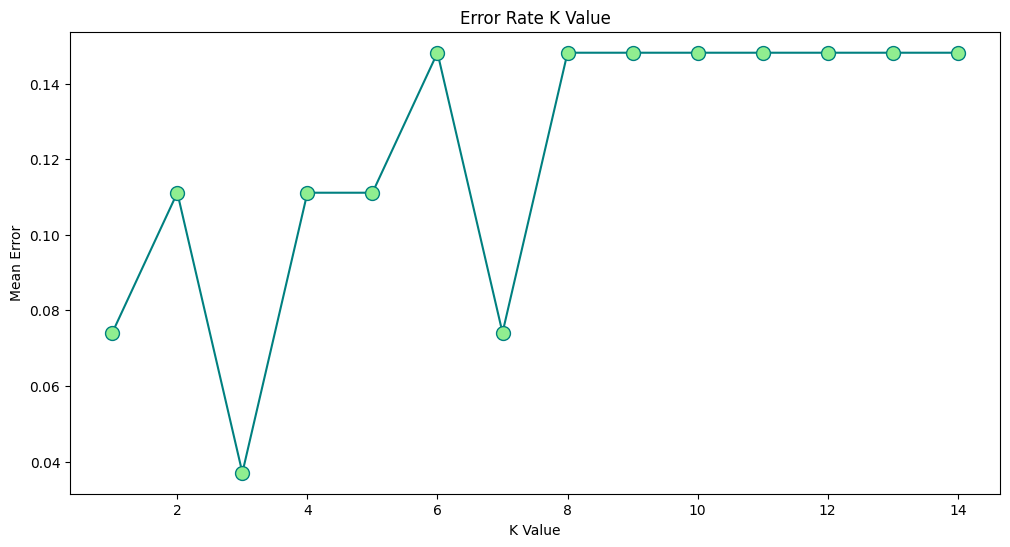

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculating error for K values between 1 and 15
for i in range(1, 15):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='teal', linestyle='-', marker='o',
         markerfacecolor='lightgreen', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 96.29629629629629 % and k = [3]


In [ ]:
knn_train = KNeighborsClassifier(n_neighbors=1)
knn_train.fit(X_train, y_train)
y_pred_KNN_train=knn_train.predict(X_train)

print("Training Accuracy  of Random ForestRandom Forest: " + str(knn_train.score(X_train, y_train))[:6])

Training Accuracy  of Random ForestRandom Forest: 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_train, y_pred_KNN_train))
print(classification_report(y_train, y_pred_KNN_train))
print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_train, y_pred_KNN_train))
pd.crosstab(y_train, y_pred_KNN_train, rownames=['Actual'], colnames=['Predicted'], margins=True)


[[92  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        14

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106



ROC AUC Score:  1.0


Predicted,0,1,All
Actual,,,
0,92,0,92
1,0,14,14
All,92,14,106


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_KNN_test = knn.predict(X_test)
y_pred_KNN_train=knn.predict(X_train)

#Evaluation

print("Testing Accuracy  of Random ForestRandom Forest: " + str(knn.score(X_test, y_test))[:6])


Testing Accuracy  of Random ForestRandom Forest: 0.9629


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KNN_test))
print(classification_report(y_test, y_pred_KNN_test))
print("\n","="*55,"\n")
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_KNN_test))
print("\n","="*55,"\n")
pd.crosstab(y_test, y_pred_KNN_test, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[23  0]
 [ 1  3]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.75      0.86         4

    accuracy                           0.96        27
   macro avg       0.98      0.88      0.92        27
weighted avg       0.96      0.96      0.96        27



ROC AUC Score:  0.875




Predicted,0,1,All
Actual,,,
0,23,0,23
1,1,3,4
All,24,3,27


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# ROC AUC

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung probabilitas prediksi kelas positif (misalnya, 1) dari model Anda
def model_performance_roc(model):
  y_pred = model.predict(X_test)[:, 1]
  # Menghitung nilai false positive rate (FPR), true positive rate (TPR), dan ambang batas (threshold) dari kurva ROC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  # Menghitung nilai AUC (Area Under the Curve) dari kurva ROC
  roc_auc = roc_auc_score(y_test, y_pred)

def plot_roc_performance(roc_performances):
  # Menampilkan kurva ROC
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], 'k--')  # Garis acak
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

def plot_models_performance(models, roc=True):
  roc_performances = dict.fromkeys(models, {'y_score': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    roc_performance = model_performance_roc(model)
    roc_performances[name] = roc_performance

    plot_roc_performance(roc_performances)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier


def model_performance_roc(model):
  y_pred = model.predict(X_test)
  y_score = y_pred[:, 1]
  auc_score = roc_auc_score(y_test, y_score)
  print('ROC AUC score: \t', auc_score)
  return {'y_score': y_score, 'auc_score': auc_score}


def plot_roc_performance(roc_performances):
  auc_vals = list(map(lambda x: x['auc_score'], roc_performances.values()))
  names = list(roc_performances.keys())

  min = np.min(auc_vals)
  max = np.max(auc_vals)

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  for name, perf in roc_performances.items():
    fpr, tpr, _ = roc_curve(y_test, perf['y_score'])
    plt.plot(fpr, tpr, '--', label=name)

  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.title('ROC curve')

  plt.subplot(122)
  sns.barplot(x=names, y=auc_vals)
  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(auc_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Area under curve (min - 0.01, max + 0.01)')

def plot_models_performance(models, roc=True):
  roc_performances = dict.fromkeys(models, {'y_score': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    roc_performance = model_performance_roc(model)
    roc_performances[name] = roc_performance

    plot_roc_performance(roc_performances)



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import VotingClassifier

def model_performance(model):
  score = model.score(X_test, y_test)
  print('-----',model.__class__.__name__,'-----')
  print('Scores: \t', score)
  return score.mean()

def model_performance_roc(model):
  y_pred = model.predict(X_test)
  auc_score = roc_auc_score(y_test, y_pred)
  print('ROC AUC score: \t', auc_score)
  return {'y_score': y_pred, 'auc_score': auc_score}

def plot_model_performance(performances):
  perf_vals = list(performances.values())
  names = list(performances.keys())

  min = np.min(perf_vals)
  max = np.max(perf_vals)

  plt.figure(figsize=(20, 10))
  sns.barplot(x=names, y=perf_vals)

  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(perf_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Algorithm performance (min - 0.01, max + 0.01)')

def plot_roc_performance(roc_performances):
  auc_vals = list(map(lambda x: x['auc_score'], roc_performances.values()))
  names = list(roc_performances.keys())

  min = np.min(auc_vals)
  max = np.max(auc_vals)

  plt.figure(figsize=(20, 10))
  plt.subplot(121)
  for name, perf in roc_performances.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, '--', label=name)

  plt.plot([0,1], [0,1], 'k--')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.title('ROC curve')

  plt.subplot(122)
  sns.barplot(x=names, y=auc_vals)
  plt.ylim(min - 0.01, max + 0.01)
  plt.yticks(auc_vals)
  plt.gca().yaxis.grid(True)
  plt.title('Area under curve (min - 0.01, max + 0.01)')

def plot_models_performance(models, roc=True):
  performances = dict.fromkeys(models, 0.0)
  roc_performances = dict.fromkeys(models, {'y_pred': 0.0, 'auc_score': 0.0})

  for name, model in models.items():
    performance = model_performance(model)
    roc_performance = model_performance_roc(model)
    performances[name] = performance
    roc_performances[name] = roc_performance

  plot_model_performance(performances)
  if roc:
    plot_roc_performance(roc_performances)



----- RandomForestClassifier -----
Scores: 	 0.9259259259259259
ROC AUC score: 	 0.75
----- KNeighborsClassifier -----
Scores: 	 0.9629629629629629
ROC AUC score: 	 0.875


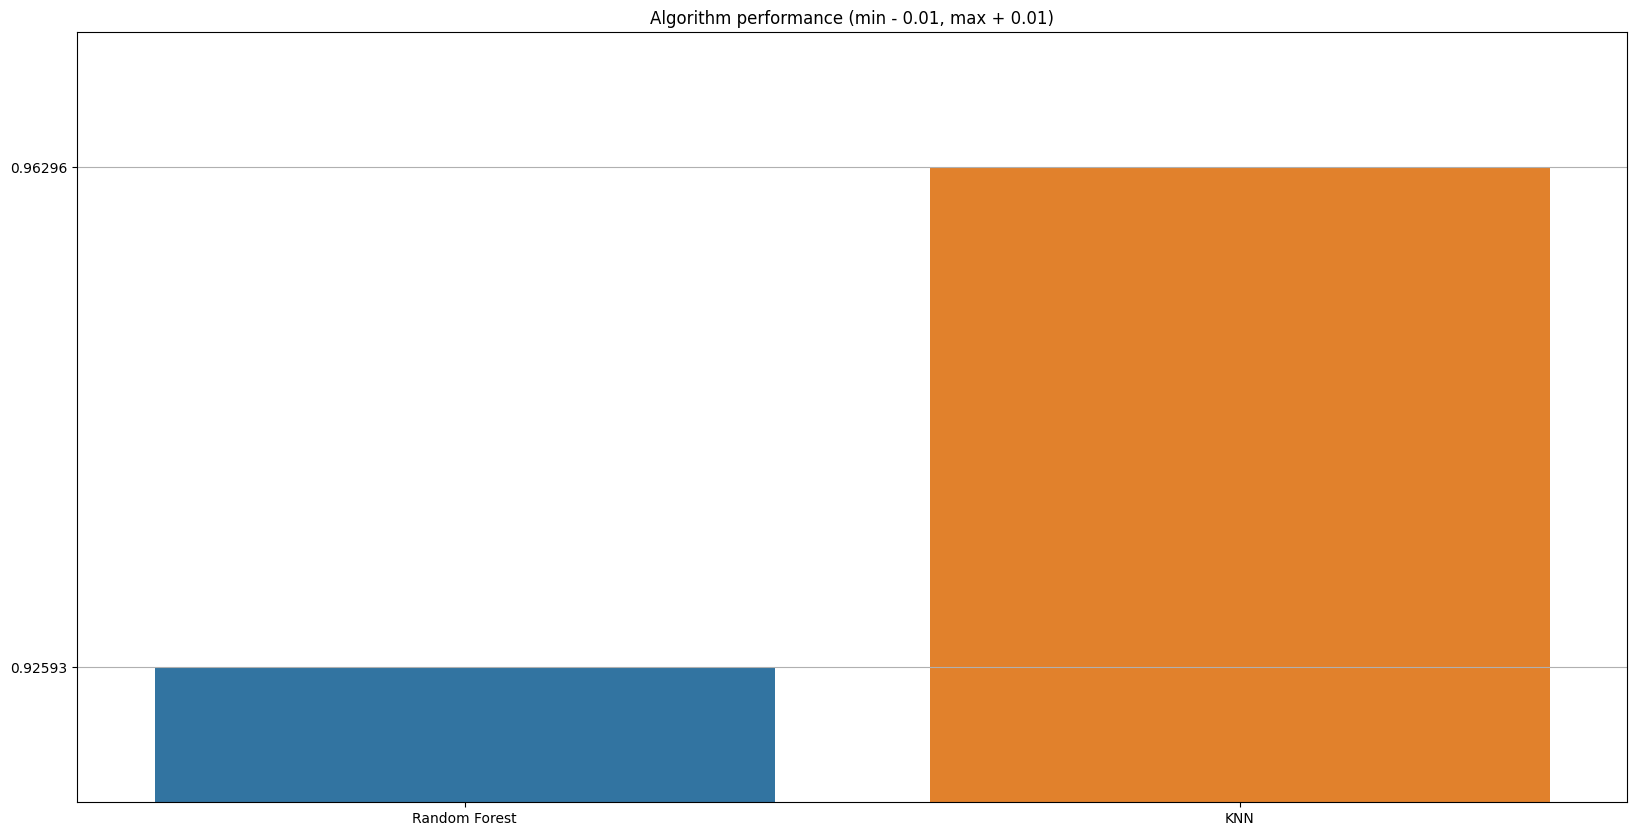

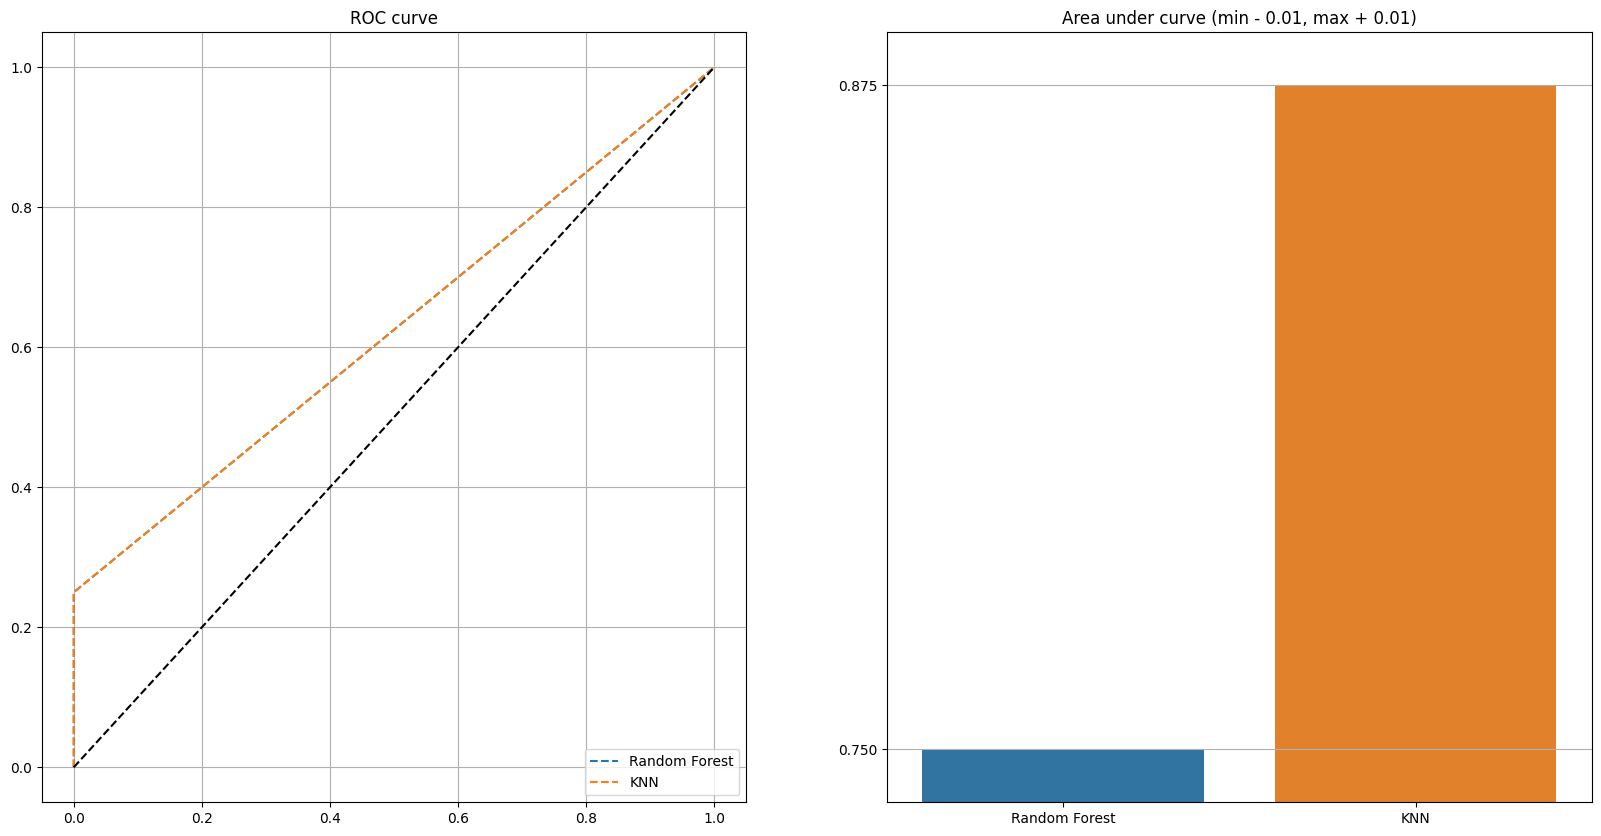

In [ ]:
models = {'Random Forest': RandomForestClassifier(max_depth=3, random_state=42, n_estimators= 50).fit(X_train, y_train),
          'KNN': KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)}

plot_models_performance(models)